In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

numpy.ndarray

array([-8.        , -2.37037037, -0.2962963 ,  0.        ,  0.2962963 ,
        2.37037037,  8.        ])

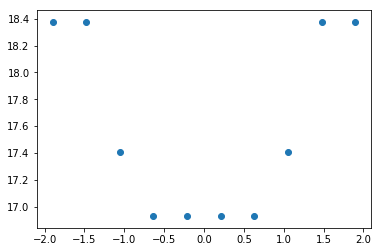

In [100]:
import numpy as np
from matplotlib import pyplot as plt
def variance(X,y):
    return (np.dot(y - np.mean(y),y - np.mean(y)))/ X.size
t= np.linspace(-1.9,1.9,10)
X = np.linspace(-2, 2, 7)
y = X ** 3
display(type(y))
Do = variance(X,y)
q=[]
for threshold in t:
    XlIndex= np.where(X<threshold)
    Xl = X[XlIndex]
    yl = y[XlIndex]
    XrIndex= np.where(X>threshold)
    Xr = X[XrIndex]
    yr=  y[XrIndex]
    q.append(Do - (len(XlIndex)/(X.size) * variance(Xl,yl)) -(len(XrIndex)/(X.size) * variance(Xr,yr)))
plt.scatter(t,q)    
display(y)


In [ ]:
display(y)
# need to scale up and truncate y floats dont work for classifiers
scale = np.array([[100]], np.int32)
scaled= np.multiply(y,scale)
scaled = scaled.astype('int')
scaled = scaled.reshape(-1,1)


In [99]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X.reshape(-1,1),scaled)
x = np.linspace(-2,2,20);
#X.reshape(-1,1)
preds  = dt.predict(x.reshape(-1,1))
plt.scatter(x, preds )

NameError: name 'X' is not defined

In [3]:
import pandas as pd
df= pd.read_csv('../input/mlbootcamp5_train.csv', index_col = 'id', sep=';')
df['age'] = df['age'].apply(lambda x : x/365)
df = pd.get_dummies(df, columns= ['cholesterol','gluc'])
df.head()


,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,,
0,50.391781,2,168,62.0,110,80,0,0,1,0,1,0,0,1,0,0
1,55.419178,1,156,85.0,140,90,0,0,1,1,0,0,1,1,0,0
2,51.663014,1,165,64.0,130,70,0,0,0,1,0,0,1,1,0,0
3,48.282192,2,169,82.0,150,100,0,0,1,1,1,0,0,1,0,0
4,47.873973,1,156,56.0,100,60,0,0,0,0,1,0,0,1,0,0


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from ipywidgets import Image
from io import StringIO
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz
train_df = df.drop(['cardio'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(train_df, df['cardio'], test_size=0.3, random_state=17)
dt = DecisionTreeClassifier(random_state=17)


735000

In [20]:
dt.fit(X_train,y_train)
feature_names_train = df.columns
feature_names_train =  feature_names.drop(['cardio'])
dot_data = StringIO()
export_graphviz(dt, feature_names = feature_names_train,
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(value=graph.create_png())



Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x06\x0b\x00\x00\x01\xf1\x08\x06\x00\x00\x00Sg\x8c\xa…

In [21]:
dt.score(X_test, y_test)

0.7212857142857143

In [37]:
from sklearn.model_selection import GridSearchCV, cross_val_score
tree_params = {'max_depth': list(range(2, 11))}
tree_grid = GridSearchCV(dt, tree_params,
cv=5, n_jobs=-1,
verbose=True, return_train_score=True)
tree_grid.fit(X_train, y_train)



Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    1.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


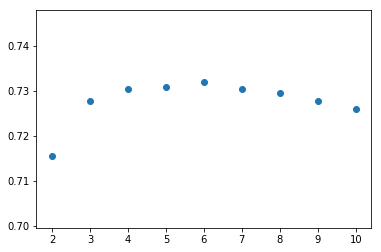

In [52]:
from matplotlib import pyplot as plt
scoring = tree_grid.grid_scores_
scores = [x.mean_validation_score for x in scoring]
depths = list(range(2, 11))
plt.scatter(depths,scores)


In [56]:

#accuracy on holdout data
dt= DecisionTreeClassifier(max_depth=6, random_state =17)
dt.fit(X_train,y_train)
dt.score(X_test, y_test)

0.7258095238095238

In [58]:
#gridsearch cvbest scores
tree_grid.best_estimator_.score(X_test, y_test)


0.7258095238095238

In [62]:
#change in accuracy
dt= DecisionTreeClassifier(max_depth=3, random_state =17)
dt.fit(X_train,y_train)
old = dt.score(X_test, y_test)
new = 0.7258095238095238
change = (new-old)/old * 100
display(old)
display(new)
display(change)


0.7212857142857143

0.7258095238095238

0.6271869016967002

In [95]:
#bin age
import pandas as pd 
df= pd.read_csv('../input/mlbootcamp5_train.csv', index_col = 'id', sep=';')
df['age'] = df['age'].apply(lambda x : x/365)
df['age'] = df['age'].astype('int')
df['age_1'] = df['age'].apply(lambda x: 1 if ((x>= 40) & (x<50)) else 0)
df['age_2'] = df['age'].apply(lambda x: 1 if ((x>= 50) & (x<55)) else 0)
df['age_3'] = df['age'].apply(lambda x: 1 if ((x>= 55) & (x<60)) else 0)
df['age_4'] = df['age'].apply(lambda x: 1 if ((x>= 60) & (x<65)) else 0)
df['bp1'] = df['ap_hi'].apply(lambda x: 1 if ((x>= 120) & (x<140)) else 0)
df['bp2'] = df['ap_hi'].apply(lambda x: 1 if ((x>= 140) & (x<160)) else 0)
df['bp3'] = df['ap_hi'].apply(lambda x: 1 if ((x>= 160) & (x<180)) else 0)
df= pd.get_dummies(df,columns=['cholesterol'])
df['gender'] = df['gender'].map({2:1,1:0})
train_df= df[['smoke','gender','age_1','age_2','age_3','age_4','bp1','bp2','bp3','cholesterol_1','cholesterol_2','cholesterol_3']]
train_df.head()




,smoke,gender,age_1,age_2,age_3,age_4,bp1,bp2,bp3,cholesterol_1,cholesterol_2,cholesterol_3
id,,,,,,,,,,,,
0,0,1,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,1,0,0,0,1
2,0,0,0,1,0,0,1,0,0,0,0,1
3,0,1,1,0,0,0,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [97]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(max_depth=3, random_state=17)
df.head()
dt.fit(train_df, df['cardio'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [98]:
feature_names_train = train_df.columns
dot_data = StringIO()
export_graphviz(dt, feature_names = feature_names_train,
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x06\x07\x00\x00\x01\xf1\x08\x02\x00\x00\x00\xc69\xfb…